In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

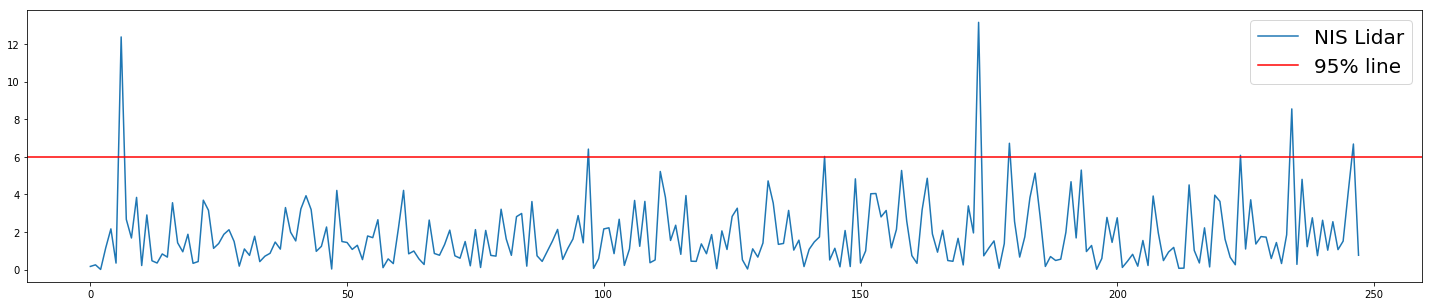

In [14]:
lidar_data = np.loadtxt("./output_files/NIS_lidar.txt", usecols=[0], skiprows=1)
plt.plot(np.arange(0,len(lidar_data)), lidar_data)
plt.axhline( y=5.99, color='r')
plt.rcParams['figure.figsize'] = [25, 5]
plt.legend(('NIS Lidar', '95% line'), fontsize=20)
plt.show()

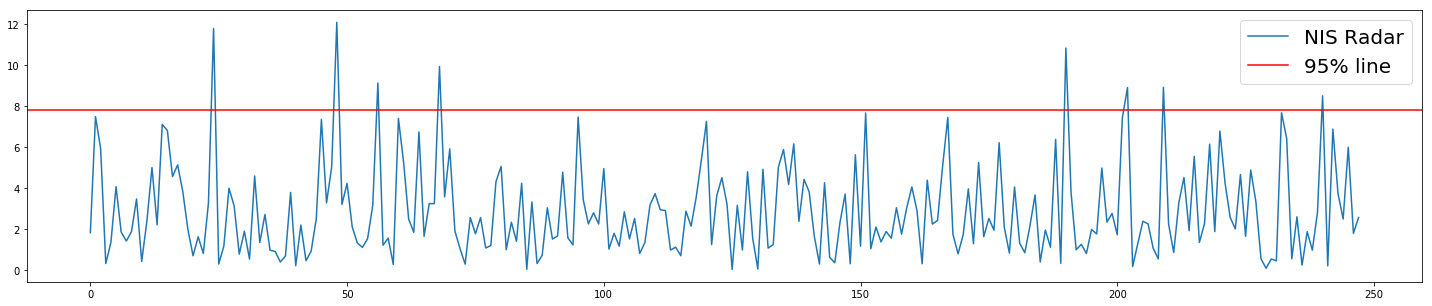

In [3]:
radar_data = np.loadtxt("./output_files/NIS_radar.txt", usecols=[0], skiprows=1)
plt.plot(np.arange(0,len(radar_data)), radar_data)
plt.axhline( y=7.82, color='r')
plt.rcParams['figure.figsize'] = [25, 5]
plt.legend(('NIS Radar', '95% line'), fontsize=20)
plt.show()

In [4]:
radar_estimates = pd.read_csv("./output_files/estimations_radar.txt", sep="\t")
radar_estimates[0:5]

,x_est,y_est,vx_est,vy_est,yaw_est,yaw_rate_est,px,py,timestamp,x_gt,y_gt,vx_gt,vy_gt,yaw_gt,yawrate_gt
0,0.734938,0.629072,7.21347,2.685830e-16,3.723350e-17,-4.948190e-17,0.862916,0.534212,1477010443050000,0.859997,0.600045,5.199747,0.001797,0.000346,0.013822
1,1.257840,0.533152,7.14775,8.777370e-01,1.221870e-01,3.046440e-02,0.969149,0.397513,1477010443150000,1.379955,0.600629,5.198979,0.010778,0.002073,0.027634
2,1.851170,0.562329,5.99106,1.626130e-01,2.713600e-02,-2.256090e-01,1.623309,0.499091,1477010443250000,1.899823,0.602470,5.197661,0.026932,0.005182,0.041430
3,2.378050,0.638483,5.56088,3.399750e-01,6.106080e-02,-3.049760e-01,1.967008,0.557117,1477010443350000,2.419540,0.606284,5.195728,0.050239,0.009669,0.055199
4,2.920580,0.650421,5.50240,2.659890e-02,4.834020e-03,-4.304330e-01,2.920341,0.645898,1477010443450000,2.939043,0.612786,5.193090,0.080668,0.015532,0.068933


In [5]:
lidar_estimates = pd.read_csv("./output_files/estimations_lidar.txt", sep="\t")
lidar_estimates[0:5]

,x_est,y_est,vx_est,vy_est,yaw_est,yaw_rate_est,px,py,timestamp,x_gt,y_gt,vx_gt,vy_gt,yaw_gt,yawrate_gt
0,0.312243,0.580340,0.00000,0.000000,0.000000,0.000000,0.312243,0.580340,1477010443000000,0.600000,0.600000,5.199937,0.000000,0.000000,0.006911
1,1.160510,0.494916,7.15837,-0.914889,-0.127118,-0.011843,1.173848,0.481073,1477010443100000,1.119984,0.600225,5.199429,0.005390,0.001037,0.020730
2,1.615990,0.595325,7.12169,1.158100,0.161205,0.046160,1.650626,0.624690,1477010443200000,1.639904,0.601347,5.198392,0.017960,0.003455,0.034535
3,2.162380,0.591950,5.98804,0.250157,0.041752,-0.171005,2.188824,0.648739,1477010443300000,2.159704,0.604086,5.196776,0.037693,0.007253,0.048318
4,2.654140,0.656351,5.56265,0.280605,0.050402,-0.287792,2.655256,0.665980,1477010443400000,2.679323,0.609155,5.194504,0.064565,0.012429,0.062071


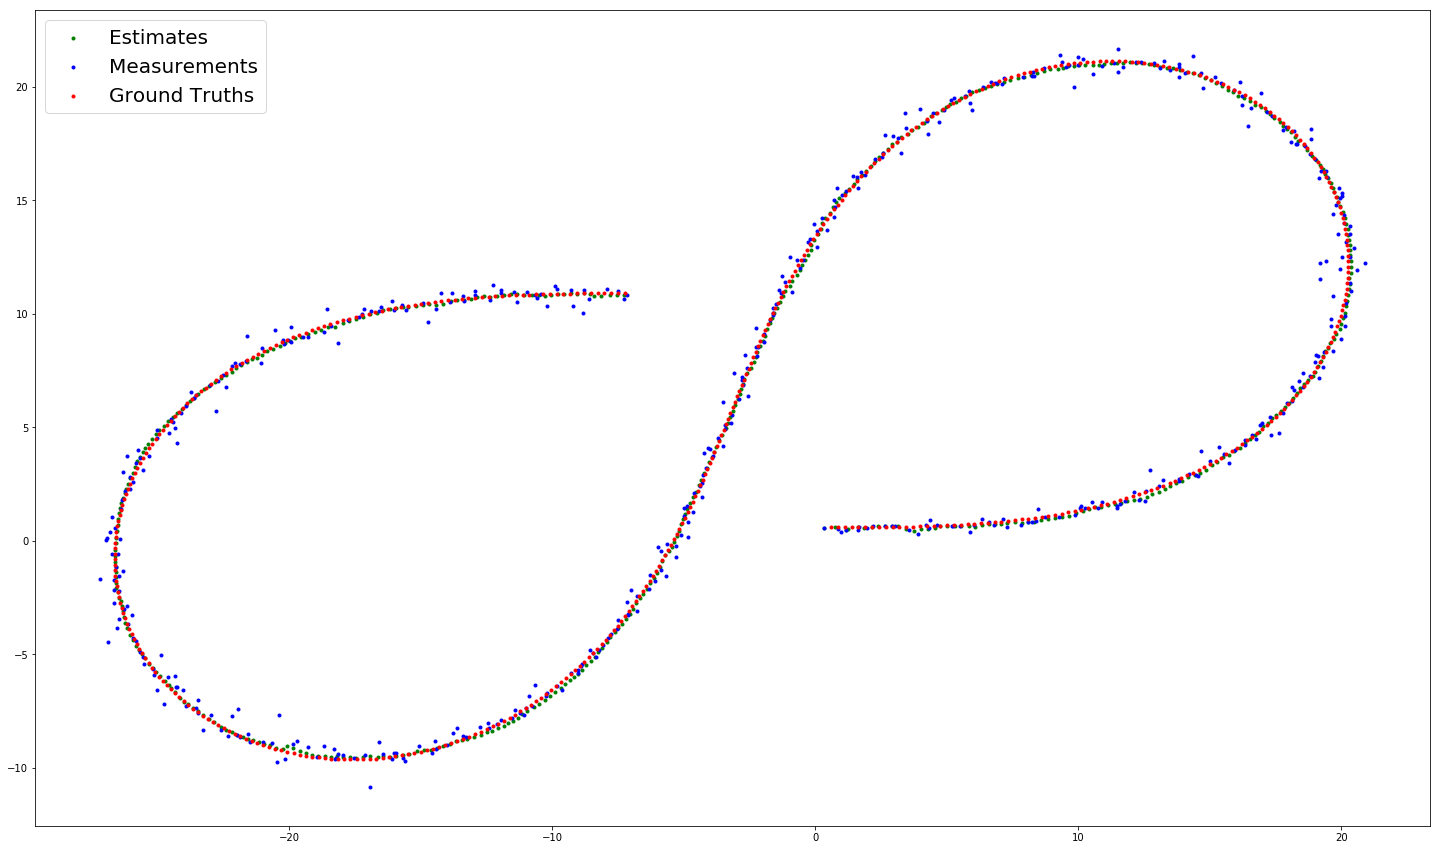

In [11]:
all_x_estimates = radar_estimates['x_est'].append(lidar_estimates['x_est'])
all_y_estimates = radar_estimates['y_est'].append(lidar_estimates['y_est'])

all_x_measurements = radar_estimates['px'].append(lidar_estimates['px'])
all_y_measurements = radar_estimates['py'].append(lidar_estimates['py'])

all_x_truths = radar_estimates['x_gt'].append(lidar_estimates['x_gt'])
all_y_truths = radar_estimates['y_gt'].append(lidar_estimates['y_gt'])

estimates = plt.scatter(
    x=all_x_estimates,
    y=all_y_estimates,
    color='g',
    marker='.'
)

measurements = plt.scatter(
    x=all_x_measurements,
    y=all_y_measurements,
    color='b',
    marker='.'
)

truths = plt.scatter(
    x=all_x_truths,
    y=all_y_truths,
    color='r',
    marker='.'
)

plt.legend((estimates, measurements, truths),
           ('Estimates', 'Measurements', 'Ground Truths'),
           scatterpoints=1,
           loc='upper left',
           fontsize=20)

plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

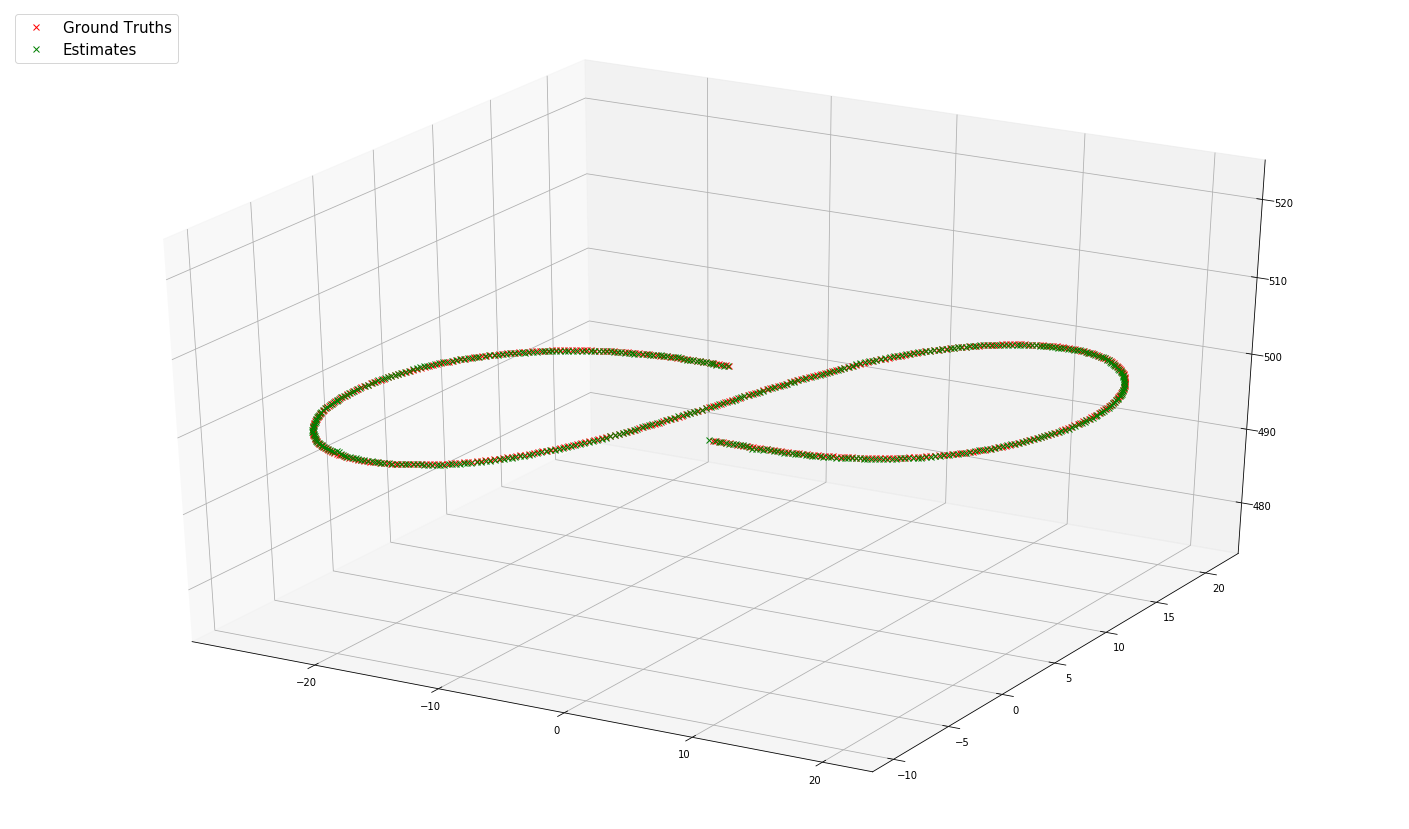

In [7]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')
ax.plot(all_x_truths, all_y_truths, len(all_x_estimates), 'x', color='r', label='Ground Truths')
ax.plot(all_x_estimates, all_y_estimates, len(all_x_estimates), 'x', color='g', label='Estimates')
# ax.plot(all_x_measurements, all_y_measurements, len(all_x_estimates), 'x', color='b', label='Measurements')
plt.legend(loc='upper left', fontsize=15)
plt.rcParams['figure.figsize'] = [20, 12]
plt.show()

In [67]:
dvx1 = lidar_estimates["vx_gt"] - radar_estimates["vx_gt"]
dt1 = lidar_estimates["timestamp"] - radar_estimates["timestamp"]
dvx2 = radar_estimates["vx_gt"].drop([len(radar_estimates["vx_gt"])-1], axis=0) - lidar_estimates["vx_gt"].drop([0], axis=0)
dt2 = radar_estimates["timestamp"].drop([len(radar_estimates["timestamp"])-1], axis=0) - lidar_estimates["timestamp"].drop([0], axis=0)
dvx = dvx1.abs().append(dvx2.abs())
dt = dt1.abs().append(dt2.abs())/1000000
acc = dvx/dt

print('Min X acc {}'.format(acc.min()))
print('Max X acc {}'.format(acc.max()))
print('Std X acc {}'.format(acc.std()))

Min X acc 0.0037999999999982492
Max X acc 2.56028
Std X acc 0.7976515238534887


In [71]:
dvy1 = lidar_estimates["vy_gt"] - radar_estimates["vy_gt"]
dt1 = lidar_estimates["timestamp"] - radar_estimates["timestamp"]
dvy2 = radar_estimates["vy_gt"].drop([len(radar_estimates["vy_gt"])-1], axis=0) - lidar_estimates["vy_gt"].drop([0], axis=0)
dt2 = radar_estimates["timestamp"].drop([len(radar_estimates["timestamp"])-1], axis=0) - lidar_estimates["timestamp"].drop([0], axis=0)
dvy = dvy1.abs().append(dvy2.abs())
dt = dt1.abs().append(dt2.abs())/1000000
acc = dvy/dt

print('Min Y acc {}'.format(acc.min()))
print('Max Y acc {}'.format(acc.max()))
print('Std Y acc {}'.format(acc.std()))

Min Y acc 0.013039999999993057
Max Y acc 2.4458800000000003
Std Y acc 0.7152965543550903


In [73]:
dv = np.sqrt(dvx*dvx + dvy*dvy)
acc = dv/dt
print('Min acc {}'.format(acc.min()))
print('Max acc {}'.format(acc.max()))
print('Std acc {}'.format(acc.std()))

Min Y acc 0.01844134485333534
Max Y acc 3.4589966679371056
Std Y acc 1.0115820882877125


In [102]:
yaw1 = lidar_estimates["yaw_gt"] - radar_estimates["yaw_gt"]
yaw2 = radar_estimates["yaw_gt"].drop([len(radar_estimates["yaw_gt"])-1], axis=0) - lidar_estimates["yaw_gt"].drop([0], axis=0)
yaw_rate = yaw1.append(yaw2).abs()/dt
print('Min yaw_rate {}'.format(yaw_rate.min()))
print('Max yaw_rate {}'.format(yaw_rate.max()))
print('Std yaw_rate {}'.format(yaw_rate.std()))

Min yaw_rate 0.006900000000005235
Max yaw_rate 0.5499999999999972
Std yaw_rate 0.16731315834757196


In [104]:
yaw_rate1 = lidar_estimates["yawrate_gt"]
yaw_rate2 = radar_estimates["yawrate_gt"]
yaw_rate = yaw_rate1.append(yaw_rate2).abs()
print('Min yaw_rate {}'.format(yaw_rate.min()))
print('Max yaw_rate {}'.format(yaw_rate.max()))
print('Std yaw_rate {}'.format(yaw_rate.std()))

Min yaw_rate 0.0
Max yaw_rate 0.55
Std yaw_rate 0.16888753245074387
